# Step 1: Load and Understand the Dataset

Load the dataset and inspect its structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

This is Option 1 to upload the dataset.

Another way to upload the dataset is:

Option 2: Dataset Already Present in the Environment

If the dataset is already available in the notebook environment (for example, uploaded manually or included in the repository), load it directly:

import pandas as pd

df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
df.head()




Notes

Ensure the dataset filename matches exactly:
PhiUSIIL_Phishing_URL_Dataset.csv

In Google Colab, uploaded files are stored temporarily and need to be re-uploaded if the runtime restarts.

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

In [ ]:
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
# View first few rows
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


The dataset consists of 235,795 instances with 56 columns. Each row represents a unique URL entry with detailed features like URL structure (length, domain, TLD), content-based attributes (number of images, JS files, CSS, etc.), and binary flags (e.g., presence of Pay/Crypto options, Copyright info).

The final column label indicates whether a URL is phishing (0) or legitimate (1).

No missing values are detected.

All columns seem appropriately typed (mostly numerical and binary).

Feature distribution can now be explored via summary statistics and EDA.

In [ ]:
# Check basic info
df.info()

# Check basic stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


We begin our analysis using the "Phishing Website" dataset from the UCI Machine Learning Repository. It contains 235,795 instances and 56 features, including URL structure, domain characteristics, and content-based attributes. The data is clean and complete, with no missing values. The target variable label identifies whether a website is phishing (0) or legitimate (1).

The dataset’s rich feature set allows for a deep dive into identifying patterns that distinguish phishing websites. A mix of numerical, categorical, and binary features makes this dataset well-suited for supervised learning tasks. The size and structure of the dataset provide a strong foundation for meaningful statistical analysis and predictive modeling within the scope of our course syllabus.

# Step 2: EDA Plan

Drop irrelevant features (like FILENAME, maybe Title and raw URL).

Encode categorical variables: TLD might be useful; we can use Label Encoding or One-Hot Encoding.

Check for duplicates.

Verify if class imbalance exists.

Scale/normalize if necessary (depends on the models we'll build later).

We will now explore the dataset to understand the distributions, patterns, and anomalies across various features. Since the dataset is large and rich, we’ll do this in focused parts:

## Histograms for Key Numerical Features
These plots help us understand how various continuous values are distributed — like URL lengths, similarity scores, and resource counts.

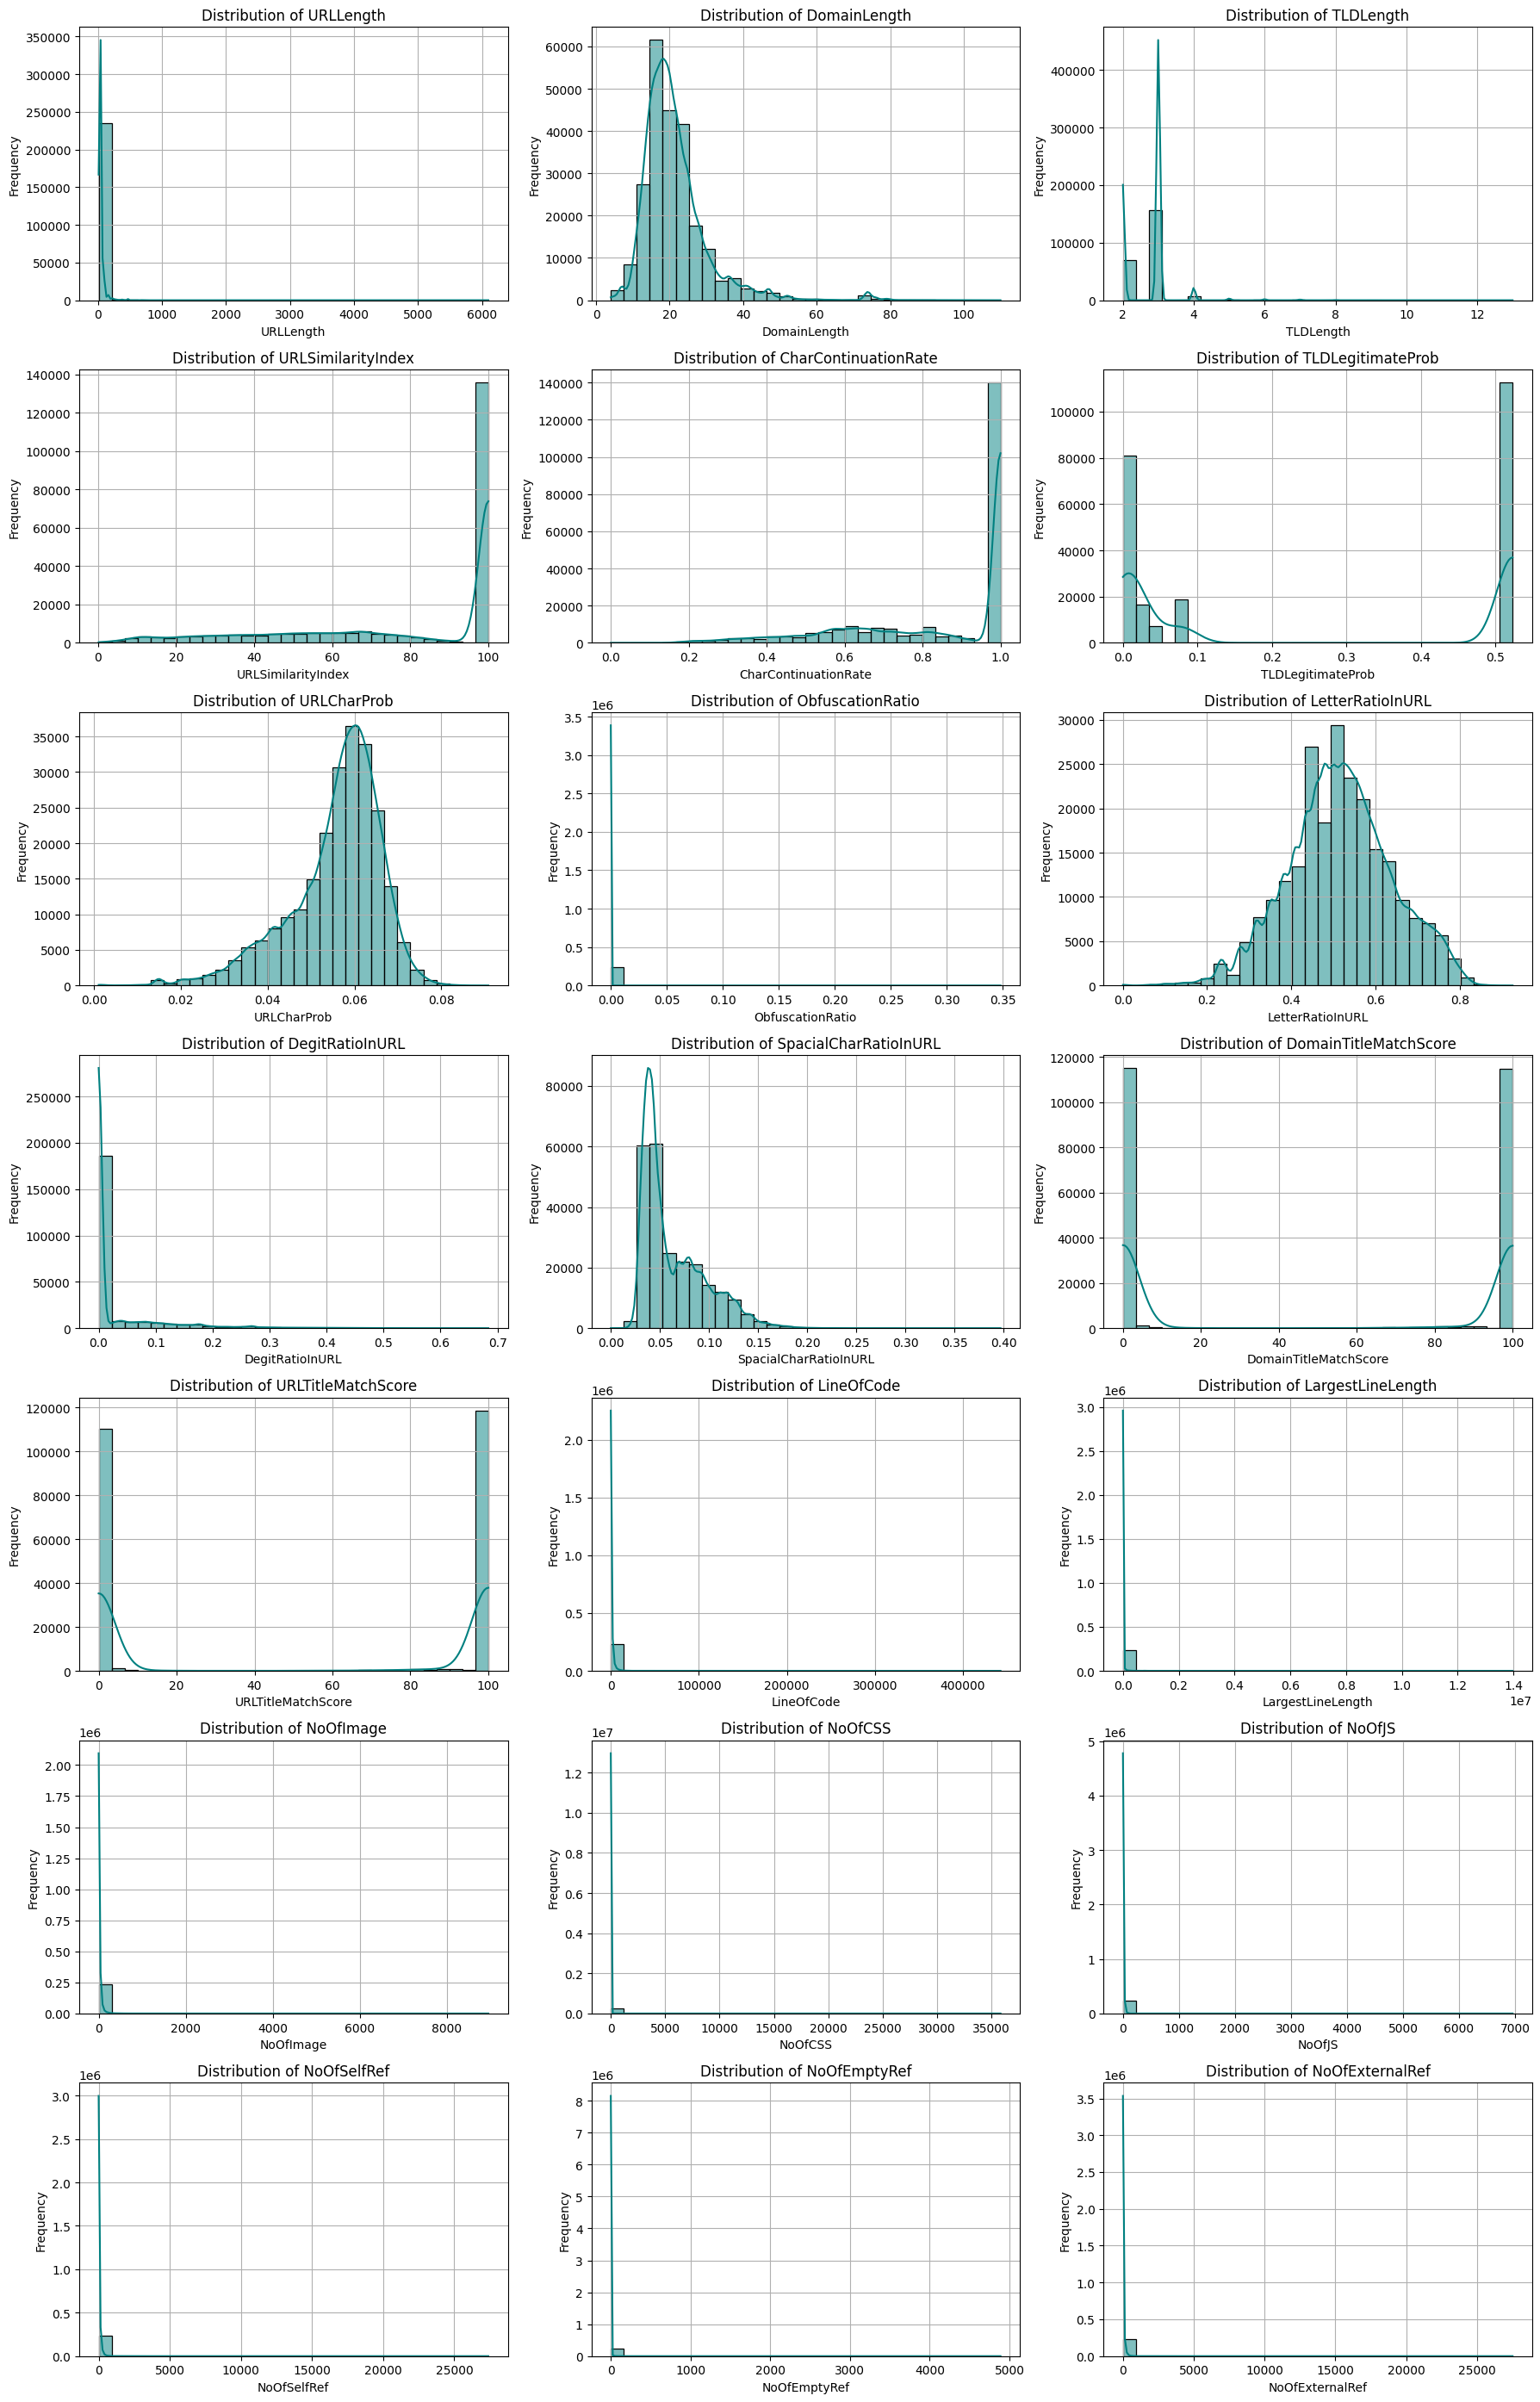

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous features
num_features = [
    'URLLength', 'DomainLength', 'TLDLength', 'URLSimilarityIndex',
    'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb',
    'ObfuscationRatio', 'LetterRatioInURL', 'DegitRatioInURL',
    'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore',
    'LineOfCode', 'LargestLineLength',
    'NoOfImage', 'NoOfCSS', 'NoOfJS',
    'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'
]

# Set up the grid
cols = 3
rows = (len(num_features) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

# Plot
for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Count Plots for Binary (0/1) Features

These binary features represent yes/no presence of specific traits (like HTTPS, obfuscation, social media links, etc.).

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


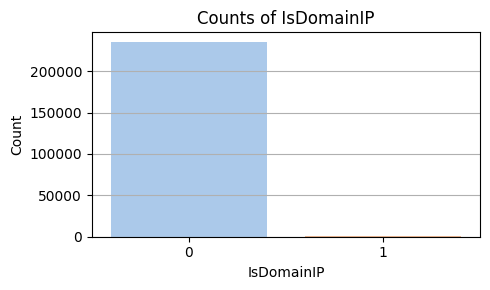

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


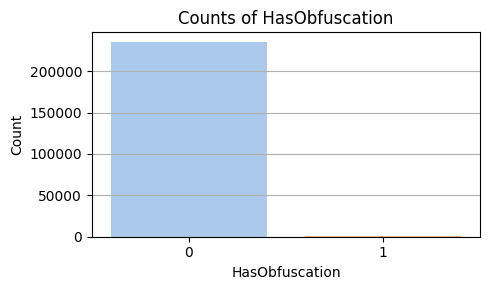

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


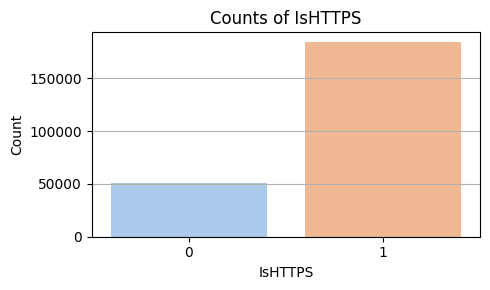

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


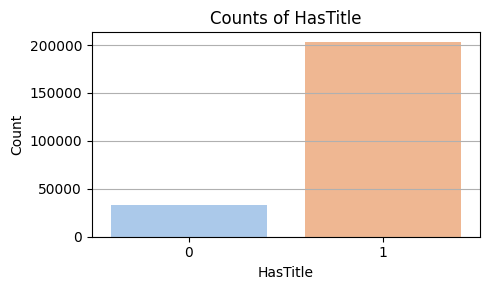

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


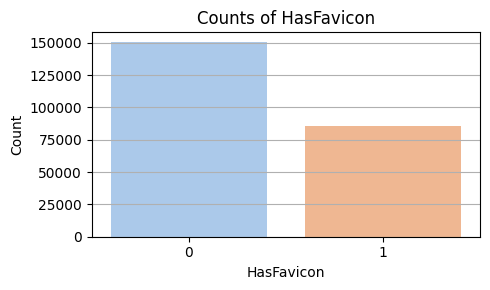

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


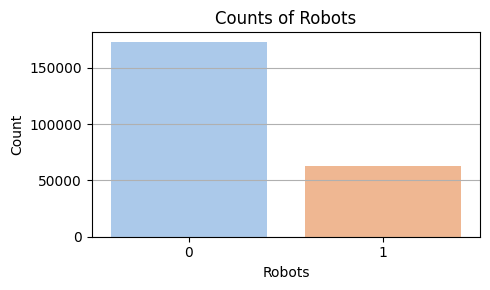

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


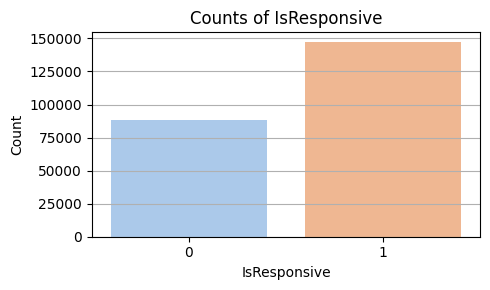

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


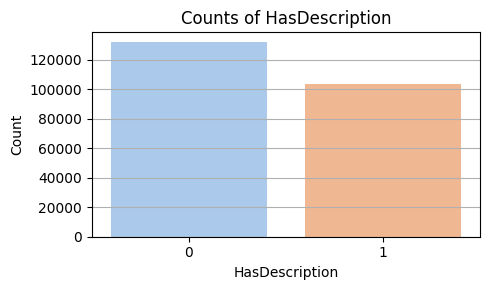

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


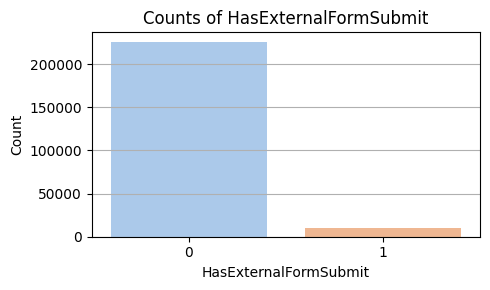

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


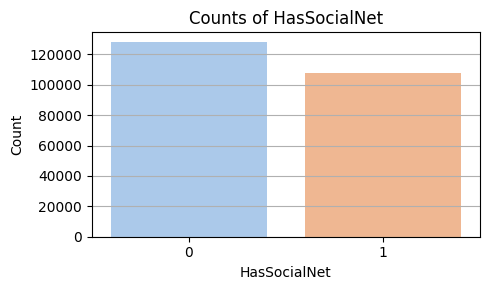

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


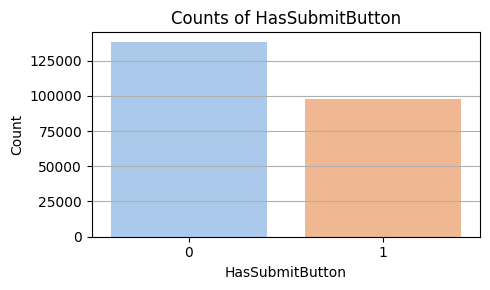

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


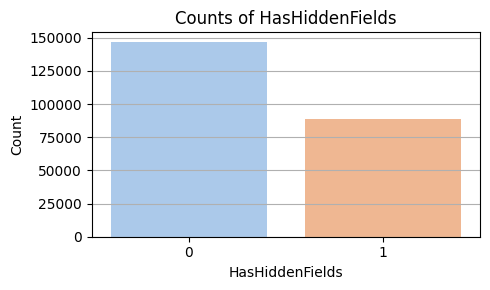

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


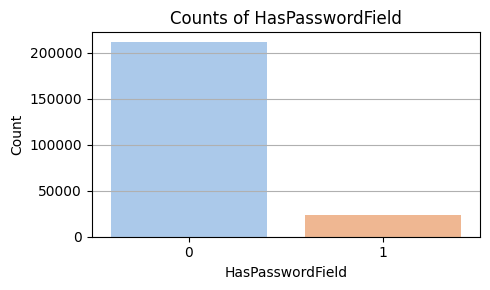

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


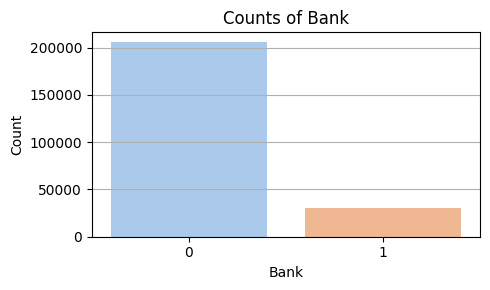

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


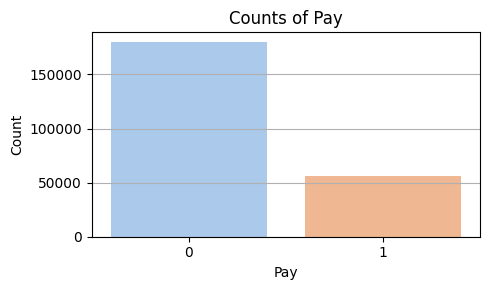

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


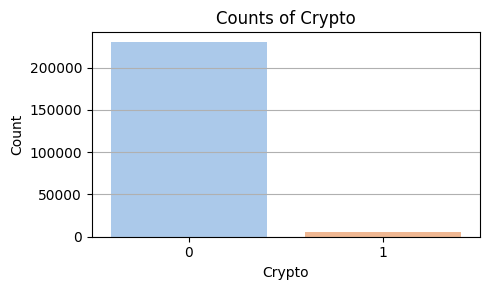

<ipython-input-6-a85ee2c42f5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


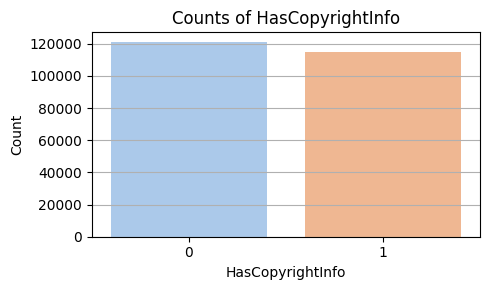

In [ ]:
binary_features = [
    'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
    'Robots', 'IsResponsive', 'HasDescription', 'HasExternalFormSubmit',
    'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField',
    'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo'
]

# Count plots
for col in binary_features:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()

Visualizations like histograms and count plots were generated to explore the distribution of numerical and categorical features. These helped identify potential outliers, skewness, and feature scaling needs. Detailed interpretations are skipped to maintain focus on key insights and model readiness.

## Class Distribution (Target Column label)
This is important to understand how balanced or imbalanced the classification problem is.

<ipython-input-7-d15077f316da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


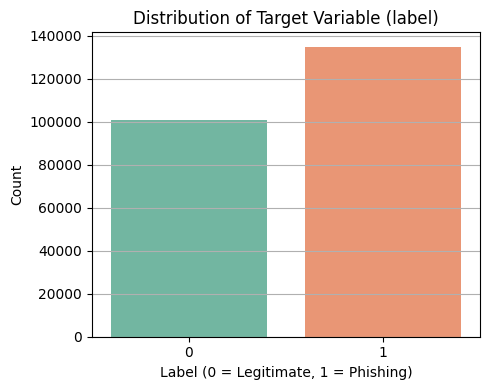

Legitimate: 42.81%, Phishing: 57.19%


In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Target Variable (label)')
plt.xlabel('Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Also print class ratio
label_counts = df['label'].value_counts(normalize=True) * 100
print(f"Legitimate: {label_counts[0]:.2f}%, Phishing: {label_counts[1]:.2f}%")

The dataset has a moderate class imbalance — phishing websites are slightly more common than legitimate ones. While this isn't extreme, it's still something to keep in mind when building models. Certain classifiers can be biased toward the majority class, so we may consider balancing strategies later (like resampling or using model class weights).

## Drop Irrelevant or Redundant Columns

We’ll remove FILENAME, URL, and optionally Title since they are either identifiers or raw text.

In [ ]:
# Drop unnecessary columns
df.drop(['FILENAME', 'URL', 'Title'], axis=1, inplace=True)

We removed FILENAME, URL, and Title because they are either identifiers or raw text. These columns don’t add value for prediction and might introduce noise. Dropping them helps simplify the dataset and reduce dimensionality.

## Encode Categorical Column TLD
Label encode TLD since it’s a short string and could contain valuable info.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode TLD
le = LabelEncoder()
df['TLD'] = le.fit_transform(df['TLD'])

The TLD (Top Level Domain) column contains categorical string values like “com”, “org”, “net”. These were encoded into numeric format using Label Encoding. This makes the column usable for machine learning models which require numerical input.

## Check for Duplicates and Remove

In [ ]:
# Check number of duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

Duplicate rows: 120


There were 120 duplicate rows in the dataset. These were removed to avoid skewing the analysis or giving unfair weight to repeated data. This step ensures data quality and helps models learn better.

# Step 3: Correlation & Feature Significance

The correlation values represent how strongly each feature is associated with the target variable (label, where 1 = phishing, 0 = legitimate). A higher absolute value means stronger influence.

This step is essential to identify features with the highest predictive potential and reduce dimensionality by excluding those with minimal contribution.

## Correlation Heatmap for Numerical Features

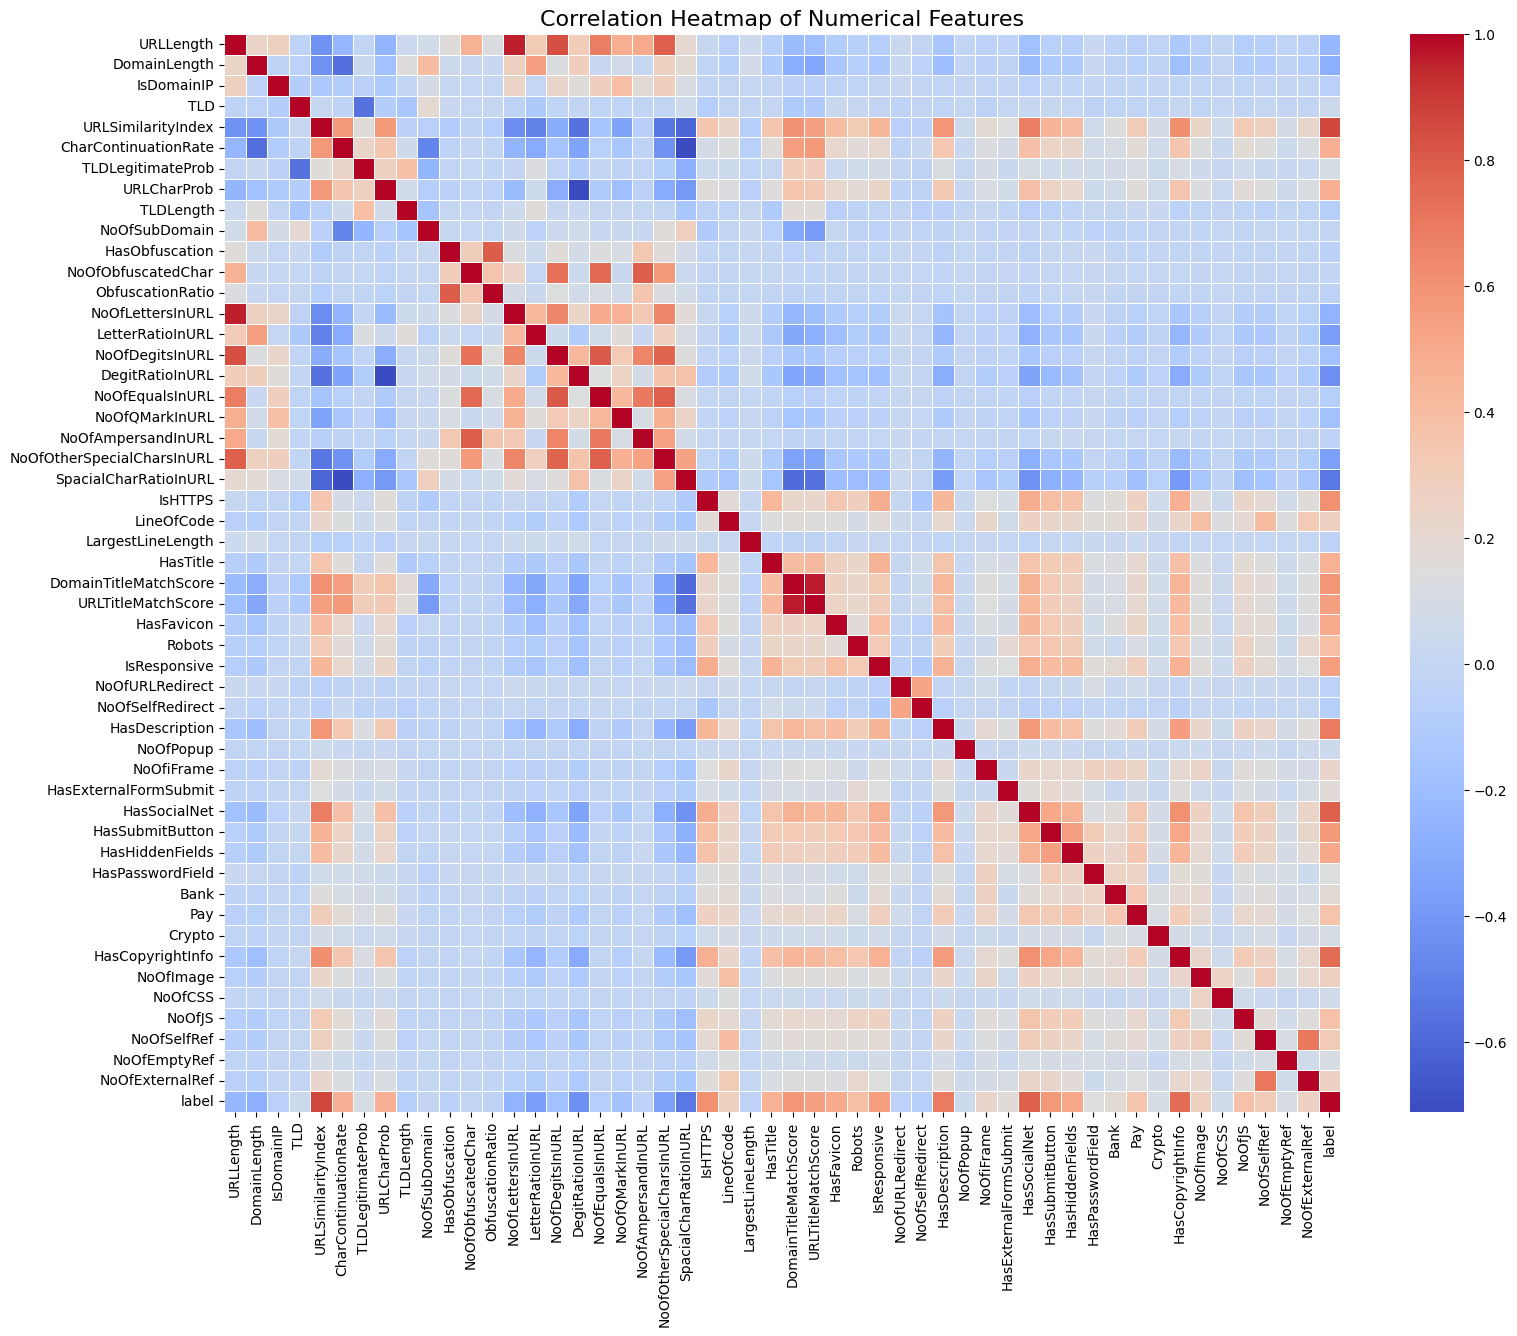

In [ ]:
import seaborn as sns

# Compute correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Set up the plot size and style
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

The heatmap above shows the pairwise correlation between all numerical features. High correlation values (close to 1 or -1) indicate strong relationships between variables, which may lead to multicollinearity issues in regression modeling and can guide feature selection.

## Compute Feature Correlation with Target

In [ ]:
# Correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Display top correlations with the target variable
cor_target = abs(corr_matrix['label']).sort_values(ascending=False)
cor_target

,label
label,1.000000
URLSimilarityIndex,0.860280
HasSocialNet,0.784149
HasCopyrightInfo,0.743396
HasDescription,0.690125
IsHTTPS,0.609541
DomainTitleMatchScore,0.584661
HasSubmitButton,0.578551
IsResponsive,0.548472
URLTitleMatchScore,0.539184


**Most Influential Features**(Correlation ≥ 0.45)

The feature URLSimilarityIndex exhibited the highest positive correlation with the label at 0.86, indicating a very strong relationship.

Other features showing a strong positive correlation (≥ 0.45) include:
HasSocialNet, HasCopyrightInfo, HasDescription, IsHTTPS, DomainTitleMatchScore, HasSubmitButton, IsResponsive, URLTitleMatchScore, SpacialCharRatioInURL, HasHiddenFields, HasFavicon.

**Moderately Important** (0.3 ≤ Corr < 0.45):

Features with moderate correlation (between 0.3 and 0.45) include:
URLCharProb, CharContinuationRate, HasTitle, DegitRatioInURL, Robots, NoOfJS, LetterRatioInURL, Pay, NoOfOtherSpecialCharsInURL, NoOfSelfRef.

Features with a low correlation (between 0.1 and 0.3) include:
DomainLength, NoOfImage, LineOfCode, NoOfExternalRef, URLLength, Bank, NoOfDegitsInURL.

Features with very weak correlation (less than 0.1) include:
Crypto, TLDLegitimateProb, TLDLength, NoOfEqualsInURL, NoOfSelfRedirect, NoOfCSS, IsDomainIP, HasObfuscation, NoOfPopup, NoOfURLRedirect, ObfuscationRatio, LargestLineLength, NoOfAmpersandInURL, NoOfObfuscatedChar, NoOfSubDomain.

These weakly correlated features are unlikely to provide significant predictive value and may introduce noise or redundancy in the model.

## Dropping Low-Correlation Features
Based on the correlation findings, features with a correlation coefficient below 0.1 were dropped from the dataset as part of the dimensionality reduction process.

Dropped Features (Correlation < 0.1):

- Crypto

- TLDLegitimateProb

- TLDLength

- NoOfEqualsInURL

- NoOfSelfRedirect

- NoOfCSS

- IsDomainIP

- HasObfuscation

- NoOfPopup

- NoOfURLRedirect

- ObfuscationRatio

- LargestLineLength

- NoOfAmpersandInURL

- NoOfObfuscatedChar

- NoOfSubDomain

In [ ]:
# Drop features with correlation less than 0.1 with the label
low_corr_features = [
    'Crypto', 'TLDLegitimateProb', 'TLDLength', 'NoOfEqualsInURL', 'NoOfSelfRedirect',
    'NoOfCSS', 'IsDomainIP', 'HasObfuscation', 'NoOfPopup', 'NoOfURLRedirect',
    'ObfuscationRatio', 'LargestLineLength', 'NoOfAmpersandInURL', 'NoOfObfuscatedChar',
    'NoOfSubDomain'
]

df.drop(columns=low_corr_features, inplace=True)

## Hypothesis Testing – Do Features Significantly Differ by Class?

In [ ]:
from scipy.stats import ttest_ind

# Separate data into phishing and legitimate
phishing = df[df['label'] == 1]
legitimate = df[df['label'] == 0]

# Choose features to test — based on correlation
features_to_test = [
    'URLSimilarityIndex', 'HasSocialNet', 'HasCopyrightInfo',
    'HasDescription', 'IsHTTPS', 'DomainTitleMatchScore'
]

# Perform t-test for each feature
for feature in features_to_test:
    t_stat, p_val = ttest_ind(phishing[feature], legitimate[feature], equal_var=False)
    print(f"{feature}: t-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")

URLSimilarityIndex: t-statistic = 708.330, p-value = 0.00000
HasSocialNet: t-statistic = 703.186, p-value = 0.00000
HasCopyrightInfo: t-statistic = 578.648, p-value = 0.00000
HasDescription: t-statistic = 508.080, p-value = 0.00000
IsHTTPS: t-statistic = 322.758, p-value = 0.00000
DomainTitleMatchScore: t-statistic = 357.267, p-value = 0.00000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


To statistically validate whether key features differ significantly between phishing and legitimate websites, independent two-sample t-tests were conducted on the top correlated features.

The following results were observed:

URLSimilarityIndex: t = 708.330, p < 0.00001

HasSocialNet: t = 703.186, p < 0.00001

HasCopyrightInfo: t = 578.648, p < 0.00001

HasDescription: t = 508.080, p < 0.00001

IsHTTPS: t = 322.758, p < 0.00001

DomainTitleMatchScore: t = 357.267, p < 0.00001

Since the p-values for all the features are effectively zero, we reject the null hypothesis in each case. This confirms that there is a statistically significant difference in the means of these features between phishing and legitimate websites.

These findings support the selection of these features for the regression model and reinforce their importance as behavioral indicators in phishing detection.

# Step 4: Data Modeling Preparation
Here the data will be setup  for machine learning model training. It includes:

1. Train-Test Split

2. Check for Class Imbalance

3. Feature Scaling (if needed)

## Train-Test Split

We will separate the features and target variable, then split the dataset into training and testing sets in an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (188540, 37)
Test set: (47135, 37)


## Class Balance Check

We already observed earlier that the classes are not perfectly balanced, with ~57% phishing and ~43% legitimate. Let's confirm this in the split data.

In [ ]:
# Class distribution in training set
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

# Class distribution in test set
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
label
1    0.572186
0    0.427814
Name: proportion, dtype: float64

Test set class distribution:
label
1    0.572186
0    0.427814
Name: proportion, dtype: float64


The distribution of classes in both the training and test sets is as follows:

Phishing websites (label = 1): 57.19%

Legitimate websites (label = 0): 42.81%

This shows that while there is some imbalance, it is not severe. The proportions are consistent across both datasets due to stratified splitting, which ensures the same class ratio in both the training and test sets.

Class imbalance is present but within acceptable limits. No need for immediate resampling techniques like SMOTE or undersampling.

## Feature Scaling

Since we plan to use MLR (distance-based models), feature scaling is essential.

In [ ]:
# Drop all non-numeric columns
non_numeric_cols = ['FILENAME', 'URL', 'Domain', 'Title', 'TLD']
X_train = X_train.drop(columns=non_numeric_cols, errors='ignore')
X_test = X_test.drop(columns=non_numeric_cols, errors='ignore')

# Apply StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The current dataset uses 'label' as a binary classification target (1 = phishing, 0 = legitimate).

MLR, however, is meant for predicting a continuous numeric value, not a binary class.

Instead of predicting the label, we will create a continuous target variable that serves as a phishing "threat score".



# Multiple Linear Regression (MLR)

URLSimilarityIndex is the target (i.e., the numeric phishing threat score) and a selected group of meaningful, high-correlation features will be predictors.

## Select Features and Target

We'll use features that showed strong correlation with the label earlier.

These include:
HasSocialNet, HasCopyrightInfo, HasDescription, IsHTTPS DomainTitleMatchScore, HasSubmitButton, IsResponsive, URLTitleMatchScore, SpacialCharRatioInURL, HasHiddenFields, HasFavicon, URLCharProb, CharContinuationRate, HasTitle


These variables are:

- Mostly binary or numeric

- Already scaled

- Strongly tied to phishing behavior

## Fit the MLR Model

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Select the same features from the original X_train
selected_features = [
    'HasSocialNet', 'HasCopyrightInfo', 'HasDescription', 'IsHTTPS',
    'DomainTitleMatchScore', 'HasSubmitButton', 'IsResponsive',
    'URLTitleMatchScore', 'SpacialCharRatioInURL', 'HasHiddenFields',
    'HasFavicon', 'URLCharProb', 'CharContinuationRate', 'HasTitle'
]

X_mlr = X_train[selected_features]  # use column names here
y_mlr = X_train['URLSimilarityIndex']  # or y_train_full if that's separate

# Scale the selected features
scaler = StandardScaler()
X_mlr_scaled = scaler.fit_transform(X_mlr)

# Add constant for intercept
X_mlr_scaled = sm.add_constant(X_mlr_scaled)

# Fit the MLR model
mlr_model = sm.OLS(y_mlr, X_mlr_scaled).fit()

# Show the summary
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:     URLSimilarityIndex   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                 3.561e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        07:54:50   Log-Likelihood:            -7.8033e+05
No. Observations:              188540   AIC:                         1.561e+06
Df Residuals:                  188525   BIC:                         1.561e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.4440      0.035   2243.997      0.0

# Multiple Linear Regression Analysis Summary

**Objective:**

To model the phishing threat score (represented by URLSimilarityIndex) using 14 carefully selected website features that exhibited strong correlation with the target variable.



**Model Fit**

R-squared: 0.725
This means 72.5% of the variation in the phishing threat score is explained by the model. This is a strong fit, especially in behavioral web analytics, where noise is high.

Adjusted R-squared: 0.725
Indicates the model remains robust even after adjusting for the number of predictors used.

**Coefficient Insights**

Each coefficient reflects the change in URLSimilarityIndex associated with a 1 standard deviation increase in that feature (because of scaling).

Significant predictors include:

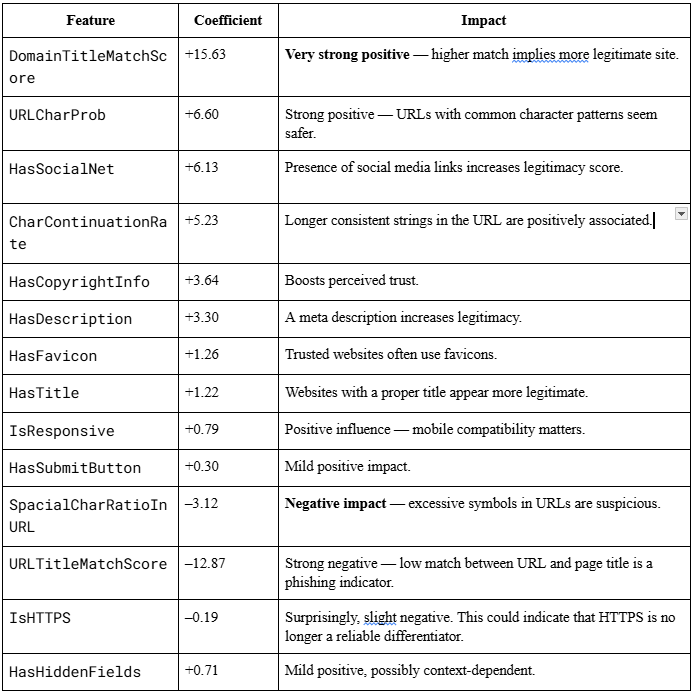

**Assumption Checks**

- Durbin-Watson: ~2.00 — suggests no autocorrelation in residuals.

- Omnibus and Jarque-Bera Tests: p < 0.05 — residuals deviate from perfect normality, which is common in large datasets.

- Skew and Kurtosis: Acceptable range.

# Conclusion

This model is statistically strong and practically meaningful, revealing key behavioral traits associated with phishing. Features like DomainTitleMatchScore, URLCharProb, and HasSocialNet stand out as top indicators of legitimacy. Conversely, mismatches between the URL and title or high symbol usage in URLs are strong phishing red flags.


This model supports cybersecurity analysts in quantifying website threat levels using measurable features.